## Neural Network Regression Model with TensorFlow

This notebook is continuation of the Blog post [TensorFlow Fundamentals](https://sandeshkatakam.github.io/My-Machine_learning-Blog/tensorflow/machinelearning/2022/02/09/TensorFlow-Fundamentals.html). **The notebook is an account of my working for the Tensorflow tutorial by Daniel Bourke on Youtube**.  
**The Notebook will cover the following concepts:**
* Architecture of a neural network regression model.
* Input shapes and output shapes of a regression model(features and labels).
* Creating custom data to view and fit.
* Steps in modelling
  * Creating a model, compiling a model, fitting a model, evaluating a model.
* Different evaluation methods.
* Saving and loading models.

**Regression Problems**: 
A regression problem is when the output variable is a real or continuous value, such as “salary” or “weight”. Many different models can be used, the simplest is the linear regression. It tries to fit data with the best hyper-plane which goes through the points.
Examples:
* How much will this house sell for?
* How many people will buy this app?
* How much will my health insurace be?
* How much should I save each week for fuel?

We can also use the regression model to try and predict where the bounding boxes should be in object detection problem. Object detection thus involves both regression and then classifying the image in the box(classification problem).


 ### Regression Inputs and outputs


Architecture of a regression model:
* Hyperparameters:
  * Input Layer Shape : same as shape of number of features.
  * Hidden Layrer(s): Problem specific
  * Neurons per hidden layer : Problem specific.
  * Output layer shape: same as hape of desired prediction shape.
  * Hidden activation : Usually ReLU(rectified linear unit) sometimes sigmoid.
  * Output acitvation: None, ReLU, logistic/tanh.
  * Loss function : MSE(Mean squared error) or MAE(Mean absolute error) or combination of both.
  * Optimizer: SGD(Stochastic Gradient Descent), Adam optimizer.

**Source:** Adapted from page 239 of [Hands-On Machine learning with Scikit-Learn, Keras & TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)


Example of creating a sample regression model in TensorFlow:

```
# 1. Create a model(specific to your problem)

model = tf.keras.Sequential([
  tf.keras.Input(shape = (3,)),
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(1, activation = None)
])

# 2. Compile the model

model.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(lr = 0.0001), metrics = ["mae"])

# 3. Fit the model

model.fit(X_train, Y_train, epochs = 100)

```

### Introduction to Regression with Neural Networks in TensorFlow

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.7.0


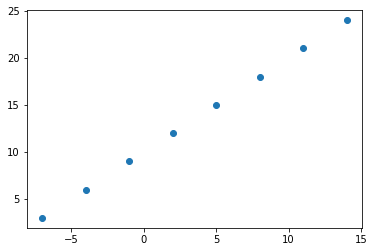

In [2]:
## Creating data to view and fit
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it
plt.scatter(X,y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

Yayy.. we got the relation by just seeing the data. Since the data is small and the relation ship is just linear, it was easy to guess the relation.

### Input and Output shapes

In [4]:
# Create a demo tensor for the housing price prediction problem
house_info = tf.constant(["bedroom","bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

we are specifically looking at scalars here. Scalars have 0 dimension

In [9]:
# Turn our numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X.shape, y.shape

(TensorShape([8]), TensorShape([8]))

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

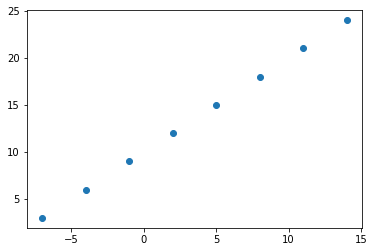

In [11]:
plt.scatter(X,y)

### Steps in modelling with Tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.

2. **Compiling a model** - define the loss function(how wrong the prediction of our model is) and the optimizer (tells our model how to improve the partterns its learning) and evaluation metrics(what we can use to interpret the performance of our model).

3. Fitting a model - letting the model try to find the patterns between X & y (features and labels).

In [12]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
X.shape

TensorShape([8])

In [14]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 533ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 10.9748 - mae: 10.9748


In [15]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

The output is very far off from the actual value. So, Our model is not working correctly. Let's go and improve our model in the next section.

### Improving our Model

Let's take a look about the three steps when we created the above model.

We can improve the model by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units(all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the learning rate of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it for training longer) or on more data (give the model more examples to learn from)


In [17]:
# Let's rebuild our model with change in the epoch number

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
  
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model to our dataset

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose = 0)

In [18]:
# Our data 
X , y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's see if our model's prediction has improved
model.predict([17.0])

array([[29.739855]], dtype=float32)

We got so close the actual value is 27 we performed a better prediction than the last model we trained. But we need to improve much better. 
Let's see what more we change and how close can we get to our actual output

In [20]:
# Let's rebuild our model with changing the optimization function to Adam

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
  
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.0001), # lr stands for learning rate 
              metrics = ["mae"])

# 3. Fit the model to our dataset

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose = 0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [21]:
# Prediction of our newly trained model:
model.predict([17.0]) # we are going to predict for the same input value 17 


array([[14.394114]], dtype=float32)

Oh..god!! This result went really bad for us.  

In [22]:
# Let's rebuild our model by adding one extra hidden layer with 100 units

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = "relu"), # only difference we made
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model to our dataset

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose = 0) # verbose will hide the output from epochs

In [23]:
X , y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [24]:
# It's prediction time!
model.predict([17.0])

array([[31.727652]], dtype=float32)

Oh, this should be 27 but this prediction is very far off from our previous prediction.  
It seems that our previous model did better than this.  

Even though we find the values of our loss function are very low than that of our previous model. We still are far away from our label value. 
**Why is that so??**  
The explanation is our model is overfitting the dataset. That means it is trying to map a function that just fits the already provided examples correctly but it cannot fit the new examples that we are giving.  
So, the `mae` and `loss value` if not the ultimate metric to check for improving the model. because we need to get less error for new examples that the model has not seen before.


In [25]:
# Let's rebuild our model by using Adam optimizer

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = "relu"), # only difference we made
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam(),  
              metrics = ["mae"])

# 3. Fit the model to our dataset

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose = 0)# verbose will hide the epochs output

In [26]:
model.predict([17.0])

array([[25.852007]], dtype=float32)

Still not better!!

In [27]:
# Let's rebuild our model by adding more layers

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = "relu"), 
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(100, activation = "relu"),# only difference we made
  tf.keras.layers.Dense(1)
])
# default value of lr is 0.001
# 2. Compile the model
model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam(lr = 0.01), # lr stands for learning rate 
              metrics = ["mae"])

# 3. Fit the model to our dataset

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose = 0) # verbose will hide the epochs output

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


The learning rate is the most important hyperparameter for all the Neural Networks

### Evaluating our model

In practice, a typical workflow you'll go through when building a neural network is:  

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak it -> fit it 
```  
Common ways to improve a deep model:  
* Adding Layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate
* Fitting on more data
* Train for longer (more epochs)  

**Because we can alter each of these they are called hyperparameters**

When it comes to evaluation.. there are 3 words you should memorize:

> "Visualize, Visualize, Visualize"

It's a good idea to visualize:
* The data - what data are working with? What does it look like
* The model itself - What does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how does the prediction of the model line up against the labels(original value)


In [28]:
# Make a bigger dataset 
X_large = tf.range(-100,100,4)
X_large

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [29]:
y_large = X_large + 10
y_large

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

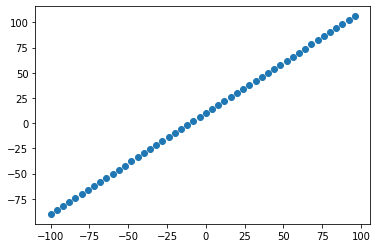

In [30]:
import matplotlib.pyplot as plt

plt.scatter(X_large,y_large)

### The 3 sets ...

* **Training set** - The model learns from this data, which is typically 70-80% of the total data you have available.

* **validation set** - The model gets tuned on this data, which is typically 10-15% of the data avaialable.

* **Test set** - The model gets evaluated on this data to test what it has learned. This set is typically 10-15%.


In [31]:
# Check the length of how many samples we have 
len(X_large)

50

In [32]:
# split the data into train and test sets
# since the dataset is small we can skip the valdation set 
X_train = X_large[:40]

X_test  =  X_large[40:]

y_train = y_large[:40]

y_test = y_large[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets. Let's visualize it.

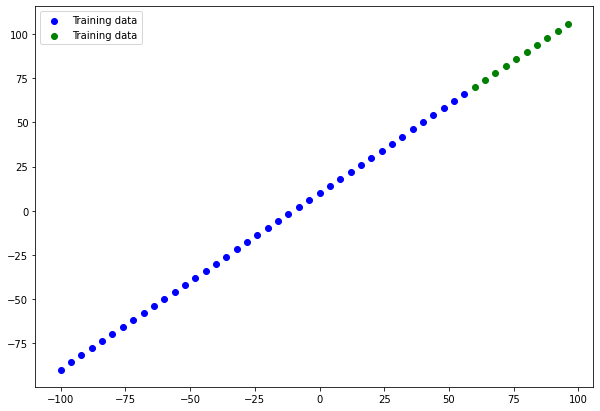

In [33]:
plt.figure(figsize = (10,7))
# Plot the training data in blue
plt.scatter(X_train, y_train, c= 'b', label = "Training data")
# Plot the test data in green
plt.scatter(X_test, y_test, c = "g", label = "Training data")
plt.legend();

In [40]:
# Let's have a look at how to build neural network for our data

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
# default value of lr is 0.001
# 2. Compile the model
model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.SGD(), # lr stands for learning rate 
              metrics = ["mae"])

# 3. Fit the model to our dataset

#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Let's visualize it before fitting the model 

In [41]:
model.summary()

ValueError: ignored

model.summary() doesn't work without building the model or fitting the model

In [35]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In [42]:
# Let's create a model which builds automatically by defining the input_shape arguments
tf.random.set_seed(42)

# Create a model(same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape = [1]) # input_shape is 1 refer above code cell
])

# Compile the model
model.compile(loss= "mae",
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])


In [43]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* **Total params** - total number of parameters in the model.
* **Trainable parameters**- these are the parameters (patterns) the model can update as it trains.
* **Non-Trainable parameters** - these parameters aren't updated during training(this is typical when you have paramters from other models during **transfer learning**)

In [55]:
# Let's have a look at how to build neural network for our data

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape = [1], name= "input_layer"),
  tf.keras.layers.Dense(1, name = "output_layer")
], name = "model_1")

# 2. Compile the model
model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.SGD(), # lr stands for learning rate 
              metrics = ["mae"])

In [56]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


We have changed the layer names and added our custom model name.

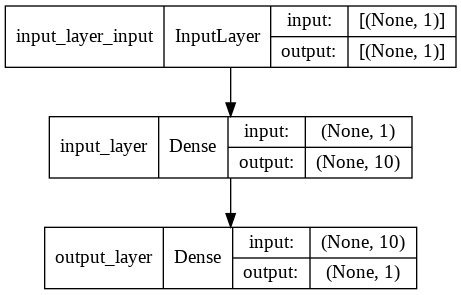

In [58]:
from tensorflow.keras.utils import plot_model
plot_model(model = model, to_file = 'model1.png', show_shapes = True)

In [38]:
# Let's have a look at how to build neural network for our data

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = "relu"), 
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(100, activation = "relu"),# only difference we made
  tf.keras.layers.Dense(1)
], name)
# default value of lr is 0.001
# 2. Compile the model
model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam(lr = 0.01), # lr stands for learning rate 
              metrics = ["mae"])

# 3. Fit the model to our dataset

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose = 0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [67]:
model.predict(X_test)

array([[15.725159],
       [16.773504],
       [17.821848],
       [18.870192],
       [19.918533],
       [20.966879],
       [22.015219],
       [23.063562],
       [24.111908],
       [25.160255]], dtype=float32)

wow, we are so close!!!

In [44]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


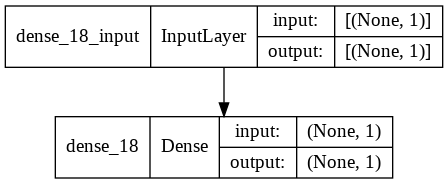

In [48]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, to_file = 'model.png', show_shapes = True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred`

In [79]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape = [1], name = "input_layer"),
  tf.keras.layers.Dense(1, name = "output_layer") # define the input_shape to our model
], name = "revised_model_1")

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [80]:
model.summary()

Model: "revised_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [82]:
model.summary()

Model: "revised_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [83]:
# Make some predictions
y_pred = model.predict(X_test)
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

These are our predictions! 

In [84]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

These are the ground truth labels!

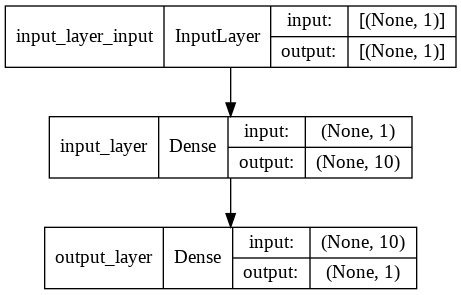

In [85]:
plot_model(model, show_shapes=True)

**Note:** IF you feel like you're going to reuse some kind of functionality in future,
it's a good idea to define a function so that we can reuse it whenever we need.

In [86]:
#Let's create a plotting function
def plot_predictions(train_data= X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels =y_test,
                    predictions = y_pred):
  """

  Plots training data, test data and compares predictions to ground truth labels

  """
  plt.figure(figsize = (10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c= "b", label = "Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c= "g", label = "Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c= "r", label = "Predictions")
  # Show legends
  plt.legend();


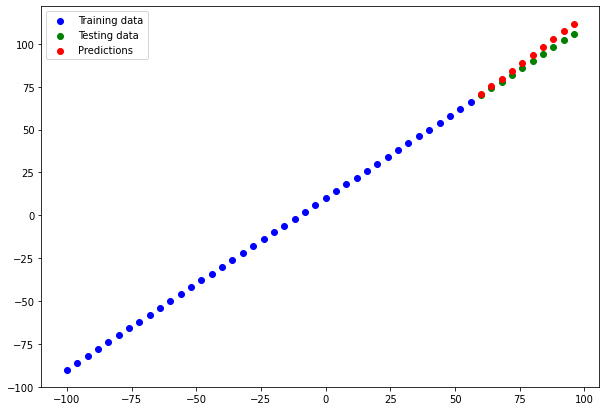

In [87]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

We tuned our model very well this time. The predictions are really close to the actual values.

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since, we're working on a regression, two of the main metrics:

* **MAE** - mean absolute error, "on average, how wrong id each of my model's predictions"
  * TensorFlow code: `tf.keras.losses.MAE()`
  * or `tf.metrics.mean_absolute_error()`
  $$ MAE = \frac{Σ_{i=1}^{n} |y_i - x_i| }{n} $$
* **MSE** - mean square error, "square of the average errors"
  * `tf.keras.losses.MSE()`
  * `tf.metrics.mean_square_error()`
  $$ MSE = \frac{1}{n} Σ_{i=1}^{n}(Y_i - \hat{Y_i})^2$$

  $\hat{Y_i}$ is the prediction our model makes.
  $Y_i$ is the label value.

* **Huber** - Combination of MSE and MAE, Less sensitive to outliers than MSE.
 * `tf.keras.losses.Huber()`



In [88]:
# Evaluate the model on test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 259ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [95]:
# calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

We got the metric values wrong..why did this happen??

In [94]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

In [90]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

Notice that the shape of `y_pred` is (10,1) and the shape of `y_test` is (10,)  
They might seem the same but they are not of the same shape.
Let's reshape the tensor to make the shapes equal.

In [96]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [97]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.squeeze(y_pred))

mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

Now,we got our metric value. The mean absolute error of our model is 3.1969407.  
Now, let's calculate the mean squared error and see how that goes.

In [98]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true = y_test,
                                    y_pred = tf.squeeze(y_pred))

mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

Our mean squared error is 13.070143. Remember, the mean squared error squares the error for every example in the test set and averages the values. So, generally, the mse is largeer than mae.  
When larger errors are more significant than smaller errors, then it is best to use mse.  
MAE can be used as a great starter metric for any regression problem.  
We can also try Huber and see how that goes.

In [99]:
# Calculate the Huber metric for our model
huber_metric = tf.losses.huber(y_true = y_test,
                               y_pred = tf.squeeze(y_pred))

huber_metric

<tf.Tensor: shape=(), dtype=float32, numpy=2.7069678>

In [100]:
# Make some functions to reuse MAE and MSE and also Huber
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_test,
                                        y_pred = tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_test,
                                        y_pred = tf.squeeze(y_pred))
  
def huber(y_true, y_pred):
  return tf.losses.huber(y_true = y_test,
                         y_pred = tf.squeeze(y_pred))

### Running experiments to improve our model  

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak it -> fit it 
``` 

1. Get more data - get more examples for your model to train on(more oppurtunities to learn patterns or relationships between features and labels).  
2. Make your mode larger(using a more complex model) - this might come in the form of more layeres or more hidden unites in each layer.  
3. Train for longer - give your model more of a chance to find patterns in the data.  

Let's do a few modelling experiments:   
1. `model_1` - same as original model, 1 layer, trained for 100 epochs.  
2. `model_2` - 2 layers, trained for 100 epochs  
3. `model_3` - 2 layers, trained for 500 epochs.  

You can design more experiments too to make the model more better



**Build `Model_1`**

In [101]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [121]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, input_shape = [1])
], name = "Model_1")

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train ,epochs = 100, verbose = 0)

In [122]:
model_1.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


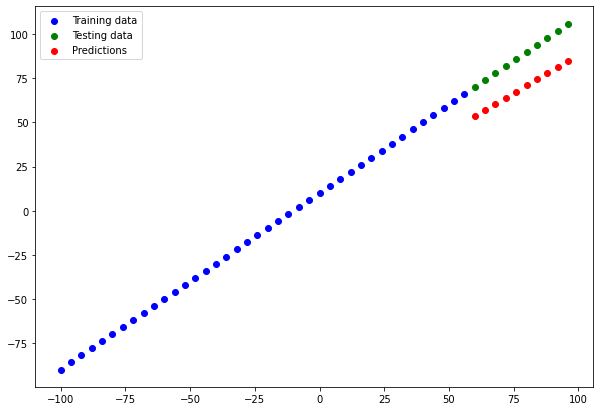

In [123]:
# Make and plot the predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions = y_preds_1)

In [124]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build `Model_2`**  

* 2 dense layers, trained for 100 epochs

In [115]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10, input_shape =[1]),
                               tf.keras.layers.Dense(1)
], name = "model_2")

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mse"]) # Let's build this model with mse as eval metric.

# 3. Fit the model
model_2.fit(X_train, y_train ,epochs = 100, verbose = 0)

In [116]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 10)                20        
                                                                 
 dense_27 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


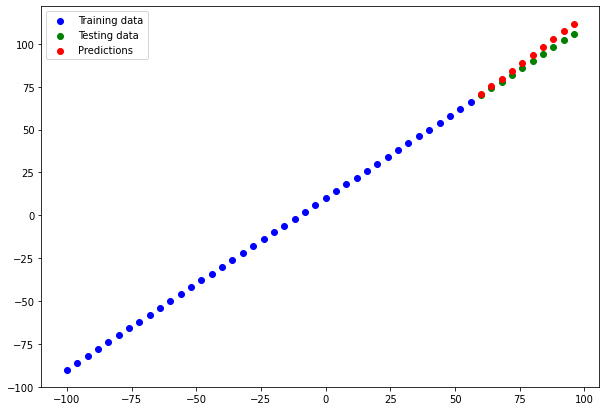

In [117]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)

plot_predictions(predictions = y_preds_2)

Yeah,we improved this model very much than the previous one. 
If you want to compare with previous one..scroll up and see the plot_predictions of
previous one and compare it with this one.

In [119]:
# Calculate the model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

**Build `Model_3`**

* 2 layers, trained for 500 epochs

In [170]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10, input_shape =[1]),
                               tf.keras.layers.Dense(1)
], name = "model_3")

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"]) # Let's build this model with mse as eval metric.

# 3. Fit the model
model_2.fit(X_train, y_train ,epochs = 500, verbose = 0)

ValueError: ignored

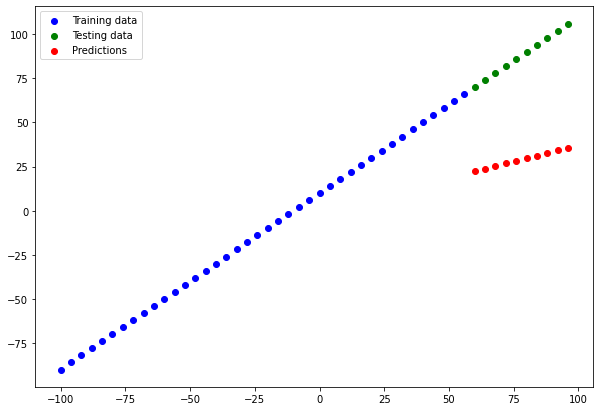

In [127]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions = y_preds_3)

This is even terrible performance than the first model. we have actually made the model worse. WHY??  

We, overfitted the model too much because we trained it for much longer than we are supposed to.

In [129]:
# Calculate the model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=59.02484>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3536.0774>)

whoaa, the error is extremely high. I think the best of our models is `model_2`

The Machine Learning practitioner's motto:

`Experiment, experiment, experiment`

**Note:**  You want to start with small experiments(small models) and make sure they work and then increase their scale when neccessary.

### Comparing the results of our experiments  
We've run a few experiments, let's compare the results now.

In [130]:
# Let's compare our models'c results using pandas dataframe:
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns =["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,59.024841,3536.077393


It looks like model_2 performed done the best. Let's look at what is model_2

In [131]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 10)                20        
                                                                 
 dense_27 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


This is the model that has done the best on our dataset.

**Note:**  One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you will figure out which don't work and in turn, get closer to figuring out what does work. Remeber, the machine learning pracitioner's motto : "experiment, experiment, experiment".

## Tracking your experiments:

One really good habit of machine learning modelling is to track the results of your experiments.  

And when doing so, it can be tedious if you are running lots of experiments.  

Luckily, there are tools to help us! 

**Resources:** As you build more models, you'll want to look into using:   

* TensorBoard - a component of TensorFlow library to help track modelling experiments. It is integrated into the TensorFlow library.

* Weights & Biases - A tool for tracking all kinds of machine learning experiments (it plugs straight into tensorboard). 

## Saving our models  

Saving our models allows us to use them outside of Google Colab(or wherever they were trained) such as in a web application or a mobile app.  

There are two main formats we can save our model: 

1. The SavedModel format
2. The HDF5 format

`model.save()` allows us to save the model and we can use it again to do add things to the model after reloading it.  

In [133]:
# Save model using savedmodel format
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


If we are planning to use this model inside the tensorflow framework. we will be better off using the `SavedModel` format. But if we are planning to export the model else where and use it outside the tensorflow framework use the HDF5 format.

In [134]:
# Save model using HDF5 format
model_2.save("best_model_HDF5_format.h5")

Saving a model with SavedModel format will give us a folder with some files regarding our model.  
Saving a model with HDF5 format will give us just one file with our model.

### Loading in a saved model

In [137]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 10)                20        
                                                                 
 dense_27 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [138]:
# Let's check is that the same thing as model_2
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 10)                20        
                                                                 
 dense_27 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [139]:
# Compare the model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [140]:
mae(y_true = y_test, y_pred = model_2_preds) == mae(y_true = y_test, y_pred = loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [141]:
# Load in a model using the .hf format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 10)                20        
                                                                 
 dense_27 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [142]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 10)                20        
                                                                 
 dense_27 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Yeah the loading of .hf format model matched with our original mode_2 format.  
So, our model loading worked correctly.

In [144]:
# Check to see if loaded .hf model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds ==  loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### Download a model(or any other file) from google colab

If you want to download your files from Google Colab: 

1. you can go to the files tab and right click on the file you're after and click download.  

2. Use code(see the cell below).

3. You can save it to google drive by connecting to google drive and copying it there.




In [145]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [148]:
# Save a file from Google Colab to Google Drive(requires mounting google drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/tensor-flow-deep-learning


In [149]:
!ls /content/drive/MyDrive/tensor-flow-deep-learning

best_model_HDF5_format.h5


We have saved our model to our google drive !!!

## A larger example  

We take a larger dataset to do create a regression model. The model we do is insurance forecast by using linear regression available from kaggle [Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance)

In [150]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [151]:
# Read in the insurance data set
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


This is a quite bigger dataset than the one we have previously worked with.

In [158]:
# one hot encoding on a pandas dataframe
insurance_one_hot = pd.get_dummies(insurance) 
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [159]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis =1)
y = insurance_one_hot["charges"]

In [160]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [161]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [163]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [164]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [156]:
insurance["smoker"] , insurance["sex"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object, 0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object)

In [173]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                           
])

# 2. Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

#3. Fit the model
insurance_model.fit(X_train, y_train,epochs = 100, verbose = 0)

In [174]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [175]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

Right now it looks like our model is not performing well, lets try and improve it.  

To try and improve our model, we'll run 2 experiments: 
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Train for longer (like 200 epochs)
3. We can also do our custom experiments to improve it.

In [182]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model 
insurance_model_2 = tf.keras.Sequential([
   tf.keras.layers.Dense(100),
   tf.keras.layers.Dense(10),
   tf.keras.layers.Dense(1)                                      
],name = "insurace_model_2")

# 2. Compile the model
insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs = 100, verbose = 1)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7409.0811 - mae:

In [183]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [191]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model 
insurance_model_3 = tf.keras.Sequential([
   tf.keras.layers.Dense(100),
   tf.keras.layers.Dense(10),
   tf.keras.layers.Dense(1)                                      
],name = "insurace_model_2")

# 2. Compile the model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs = 200, verbose = 0)

In [185]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

Text(0.5, 1.0, 'Training curve of our model')

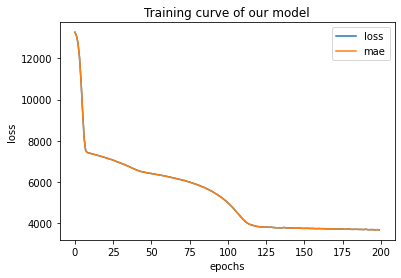

In [187]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title("Training curve of our model")

**Question:** How long should you train for?  

It depends, It really depends on problem you are working on. However, many people have asked this question before, so TensorFlow has a solution!, It is called [EarlyStopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.



## Preprocessing data (normalization and standardization)

Short review of our modelling steps in TensorFlow:  
1. Get data ready(turn into tensors)
2. Build or pick a pretrained model (to suit your problem)
3. Fit the model to the data and make a prediction.
4. Evaluate the model.
5. Imporve through experimentation.
6. Save and reload your trained models.

we are going to focus on the step 1 to make our data set more rich for training.
some steps involved in getting data ready:  
1. Turn all data into numbers(neural networks can't handle strings).
2. Make sure all of your tensors are the right shape.
3. Scale features(normalize or standardize, neural networks tend to prefer normalization) -- this is the one thing we haven't done while preparing our data. 

**If you are not sure on which to use for scaling, you could try both and see which perform better**

In [192]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [193]:
# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow few classes from Scikit-Learn

In [195]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

**Feature Scaling**:


| **Scaling type** | **what it does** | **Scikit-Learn Function** | **when to use** |  
| --- | --- | --- | --- |   
| scale(refers to as normalization) | converts all values to between 0 and 1 whilst preserving the original distribution | `MinMaxScaler` | Use as default scaler with neural networks |  
| Standarization | Removes the mean and divides each value by the standard deviation | `StandardScaler` | Transform a feature to have close to normal distribution |
 

In [197]:
#Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # Turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"])
)

# Create our X and Y values
# because we reimported our dataframe
X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

# Build our train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Fit the column transformer to our training data (only training data)
ct.fit(X_train)

# Transform training and test data with normalization(MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [200]:
# What does our data look like now??
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [203]:
X_train_normal[0], X_train_normal[12], X_train_normal[78] 
# we have turned all our data into numerical encoding and aso normalized the data


(array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]),
 array([0.67391304, 0.37570621, 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]),
 array([0.43478261, 0.33118106, 0.2       , 0.        , 1.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ]))

In [204]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! our data has been normalized and One hot encoded. Let's build Neural Network on it and see how it goes.

In [215]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
   tf.keras.layers.Dense(100),
   tf.keras.layers.Dense(10),
   tf.keras.layers.Dense(1)                                      
])

# 2. Compile the model
insurance_model_4.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

# 3. Fit the model
history = insurance_model_4.fit(X_train_normal, y_train, epochs= 100, verbose = 0)

In [216]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

In [217]:
insurance_model_4.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 100)               1200      
                                                                 
 dense_72 (Dense)            (None, 10)                1010      
                                                                 
 dense_73 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'Training curve of insurance_model_4')

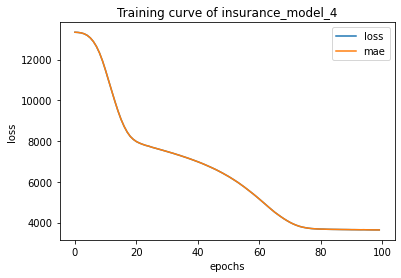

In [218]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title("Training curve of insurance_model_4")

Let's just plot some graphs. Since we have use them the least in this notebook.

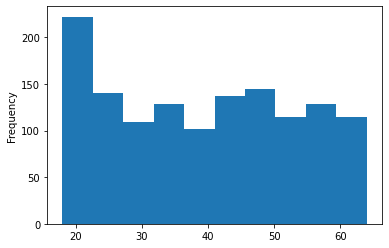

In [188]:
X["age"].plot(kind = "hist")

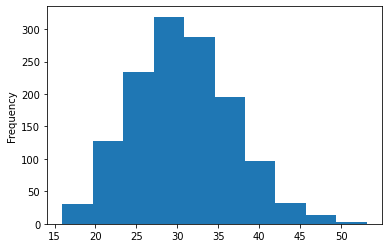

In [189]:
X["bmi"].plot(kind = "hist")

In [190]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

## **External Resources:**   
* [MIT introduction deep learning lecture 1](https://youtu.be/njKP3FqW3Sk)
* [Kaggle's datasets](https://www.kaggle.com/data)
* [Lion Bridge's collection of datasets](https://lionbridge.ai/datasets/)

## Bibliography:

* [Learn TensorFlow and Deep Learning fundamentals with Python (code-first introduction) Part 1/2](https://www.youtube.com/watch?v=tpCFfeUEGs8&list=RDCMUCr8O8l5cCX85Oem1d18EezQ&start_radio=1&rv=tpCFfeUEGs8&t=3)

* [Medical cost personal dataset](https://www.kaggle.com/mirichoi0218/insurance)

* [TensorFlow documentation](https://www.tensorflow.org/api_docs/python/tf)

* [TensorFlow and Deep learning Daniel Bourke GitHub Repo](https://github.com/mrdbourke/tensorflow-deep-learning)